In [9]:
#MODEL fx=10^3  #C:\Users\HP\21cmCosmologyProject_Cosmic_Dawn\
import numpy as np
import matplotlib.pyplot as plt

file='10.110zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+04_sed3_al1.200lyalpha.cbin'
file_xalpha=open(file,'rb')#open
n=np.fromfile(file_xalpha,count=3,dtype='int32')#removing header info
print(n)   
field_xalpha=np.fromfile(file_xalpha,dtype='float32')#read
field_xalpha


[600 600 600]


array([805.28503, 802.17474, 799.7735 , ..., 815.15826, 812.9517 ,
       808.7307 ], dtype=float32)

In [11]:
print("Array size=", len(field_xalpha))

Array size= 216000000


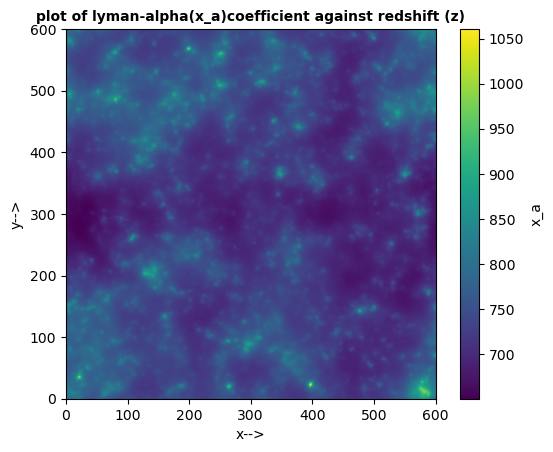

In [13]:
field_xalpha=field_xalpha.reshape((600,600,600),order='C')
fig,ax=plt.subplots()
plt.imshow(field_xalpha[0],)#first plane along z direction
ax.set_title("image of lyman-alpha(x_a)coefficient",fontsize=10,fontweight='bold')
ax.set_xlabel('x-->')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_ylabel('y-->')
plt.colorbar(label='x_a',orientation="vertical")
plt.show()

In [ ]:
"""
10.110zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+00_sed3_al1.200lyalpha
10.110zeta0.100E+01fesc0.100E+01_Mmin0.100E+11_MminX0.100E+11_fx0.100E+00_sed3_al1.200lyalpha
10.290zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+00_sed3_al1.200lyalpha
10.290zeta0.100E+01fesc0.100E+01_Mmin0.100E+11_MminX0.100E+11_fx0.100E+00_sed3_al1.200lyalpha
10.290zeta0.100E+01fesc0.100E+01_Mmin0.100E+11_MminX0.100E+11_fx0.100E+00_sed3_al1.200lyalpha
10.478zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+00_sed3_al1.200lyalpha

"""

In [ ]:
d_path=r'G:\CD_data_project'
models=["fx0.100E+00","fx0.464E+02","fx0.100E+04"]
solar_mass="Mmin0.100E+10"
c=['blue','red','green']
for i,fx in enumerate(models):
    redshifts,mean_xa=redS_meanXa(fx,solar_mass)
    print(f"Model: {fx}, Points read: {len(redshifts)}") #print the model names read and corresponding count oof redshifts
    z,spline=z_Spline(redshifts,mean_xa)
    plt.plot(z,spline(z), label=f"{fx}", color=c[i], linewidth=2) #distinguish the curves 

plt.title("change observed in different fx for fixed halo-mass $10^{9} M_\\odot$")
plt.xlabel("<--Redshift z")
plt.ylabel("$x_\\alpha$ -->")
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import os
import numpy as np
import scipy.interpolate as scI
import matplotlib.pyplot as plt
import glob

d_path=r'G:\CD_data_project'

def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    x_alpha=np.fromfile(f,dtype='float32')
    return x_alpha,n

data,grid_size=read_data(d_path)
nx,ny,nz=grid_size
volume = data.reshape((nx, ny, nz))
z_slice = volume[:, :, nz // 2]


plt.figure(figsize=(8, 6))
plt.imshow(z_slice, cmap='plasma', origin='lower')
plt.title("2D slice of $T_K$ at z = 14.699")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="$T_K$ [K]")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

file='C:\Users\HP\Downloads\14.294zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+04_sed3_al1.200lyalpha.cbin'
file_xalpha=open(file,'rb')#open
n=np.fromfile(file_xalpha,count=3,dtype='int32')#removing header info
print(n)   
field_xalpha=np.fromfile(file_xalpha,dtype='float32')#read
field_xalpha



FileNotFoundError: [Errno 2] No such file or directory: '14.294zeta0.100E+01fesc0.100E+01_Mmin0.100E+10_MminX0.100E+10_fx0.100E+04_sed3_al1.200lyalpha.cbin'

In [ ]:
print("Array size=", len(field_xalpha))

In [ ]:
field_xalpha=field_xalpha.reshape((600,600,600),order='C')
fig,ax=plt.subplots()
plt.imshow(field_xalpha[0],)#first plane along z direction
ax.set_title("image of lyman-alpha(x_a)coefficient",fontsize=10,fontweight='bold')
ax.set_xlabel('x-->')
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_ylabel('y-->')
plt.colorbar(label='x_a',orientation="vertical")
plt.show()

In [47]:
#to check for duplicates
import os
import glob
from collections import defaultdict

# Set your directory path here
d_path = r'G:\CD_data_project'

# Define model and halo mass
model = "fx0.100E+04"
halo_mass = "Mmin0.100E+11"

# File pattern for Lyman-alpha files with this model and halo mass
pattern = os.path.join(d_path, f"*{halo_mass}*_{model}_*xhi.cbin")

# Find all matching files
files = glob.glob(pattern)

# Dictionary to group files by redshift
z_file_map = defaultdict(list)

def extract_redshift(fname):
    """Extracts the redshift value from filename assuming it's before 'zeta'."""
    base = os.path.basename(fname)
    z_part = base.split('zeta')[0]
    try:
        return float(z_part)
    except ValueError:
        return None

# Group files by redshift
for file in files:
    z = extract_redshift(file)
    if z is not None:
        z_file_map[z].append(file)

# Print duplicate redshift entries
print("Checking for duplicate Lyman-alpha files...\n")
duplicates_found = False
for z, file_list in z_file_map.items():
    if len(file_list) > 1:
        duplicates_found = True
        print(f"Redshift {z:.3f} has {len(file_list)} files:")
        for f in file_list:
            print(f"  → {f}")

if not duplicates_found:
    print("No duplicate Lyman-alpha files found for the given model and halo mass.")


Checking for duplicate Lyman-alpha files...

No duplicate Lyman-alpha files found for the given model and halo mass.
